### Feature Selection Importance

When we have hundreds to thousands of features, it is impossible to deal with them using domain understanding. <br>

<b>Curse of dimensionality</b> - Having large amounts of features in the dataset. <br>

Adding more relevant dimensions can improve the performance of the model, but there is an optimal point. Beyond this point, the performance goes down. This is the curse of dimensionality.<br>

Having fewer features make it more explainable, improves accuracy as we remove unwanted features/noise, reduce the training time, and reduce overfitting. <br>


### Univariate Feature Selection

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

<b>P-Value:</b> The p-value can be interpreted as the probability of getting a result that is as extreme or more extreme when the null hypothesis (status quo) is true. <i>How likely is it that I would get the data I have, assuming the null hypothesis is true?</i><br>

<b>Alpha:</b> Alpha is the probability of rejecting the null hypothesis when it was in fact true. <br>

If P-value < alpha, we reject the null. If P-value > alpha, we keep the null.

<ul>
    <li>Get all independent features</li>
    <li>Apply a relevant statistical method</li>
    <li>Get the P-value and compare with the significance level</li>
    <li>Select the feature if P-value is less than alpha</li>
</ul>

Our null hypothesis here is that the feature is not significant. Alternate hypothesis = feature is significant. <br>

Degree of freedom: No. of variables that are free to vary in the calculation of a statistic<br>

<b>F-test</b>
<ul>
    <li>F-Distribution: Part of the ANOVA statistical method. The distribution of the F-score when we compare two or more features. </li>
    <li>The F-Test does a hypothesis testing model X and Y where X is a model created by just a constant and Y is the model created by a constant and a feature.</li>
    <li>F-Test is useful in feature selection as we get to know the significance of each feature in improving the model.</li>
    <li><b>There are some drawbacks of using F-Test to select your features. F-Test checks for and only captures linear relationships between features and labels. A highly correlated feature is given higher score and less correlated features are given lower score.
        Correlation is highly deceptive as it doesn’t capture strong non-linear relationships.</b></li>
    <li>h0: The feature is not important. h1: The feature is important</li>
    <li>When we calculate the F-score between the independent var and the dependent var, <b>if p-value is below 0.05, we select that independent feature.</b></li>
    <li>When we calculate the F-score for numerical features, we use f_regression, if categorical, use f_classif</li>
    
</ul>
<div>
    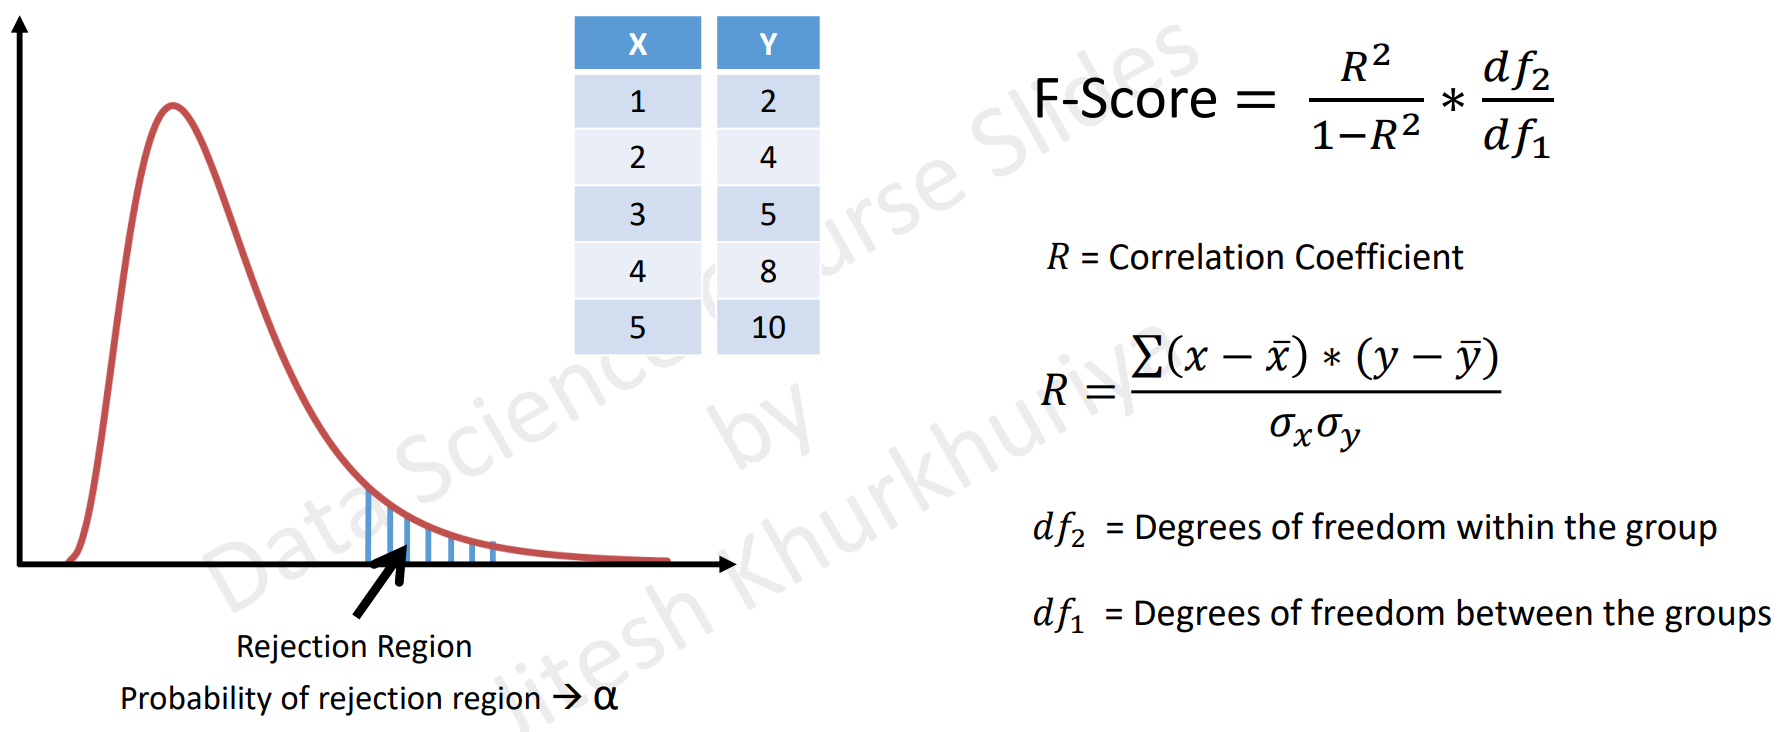
</div>


<b>Chi-Squared Test</b>
<ul>
    <li>Evaluates the relationship between categorical variables. When we apply it to 2 categorical variables, we are checking if the 2 features are correlated or not.</li>
    <li>Null Hypothesis – There is no relationship between cat feature 1 and cat feature 2. Alt hypothesis - There is relationship between cat feature 1 and cat feature 2. We reject the null hypothesis is chi-squared value is greater than critical value (from table)</li>
    <li> In step 6, it is original value - expected value</li>
    <li>The sum of all of the values for the table in step 6 gives us our chi-square value</li>
</ul>

<div>
    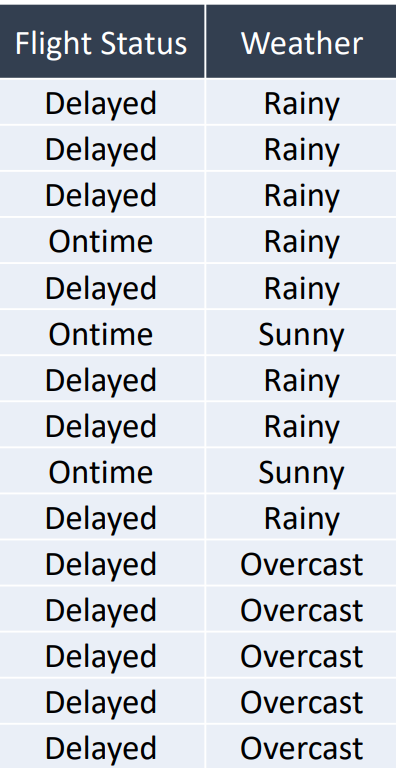
    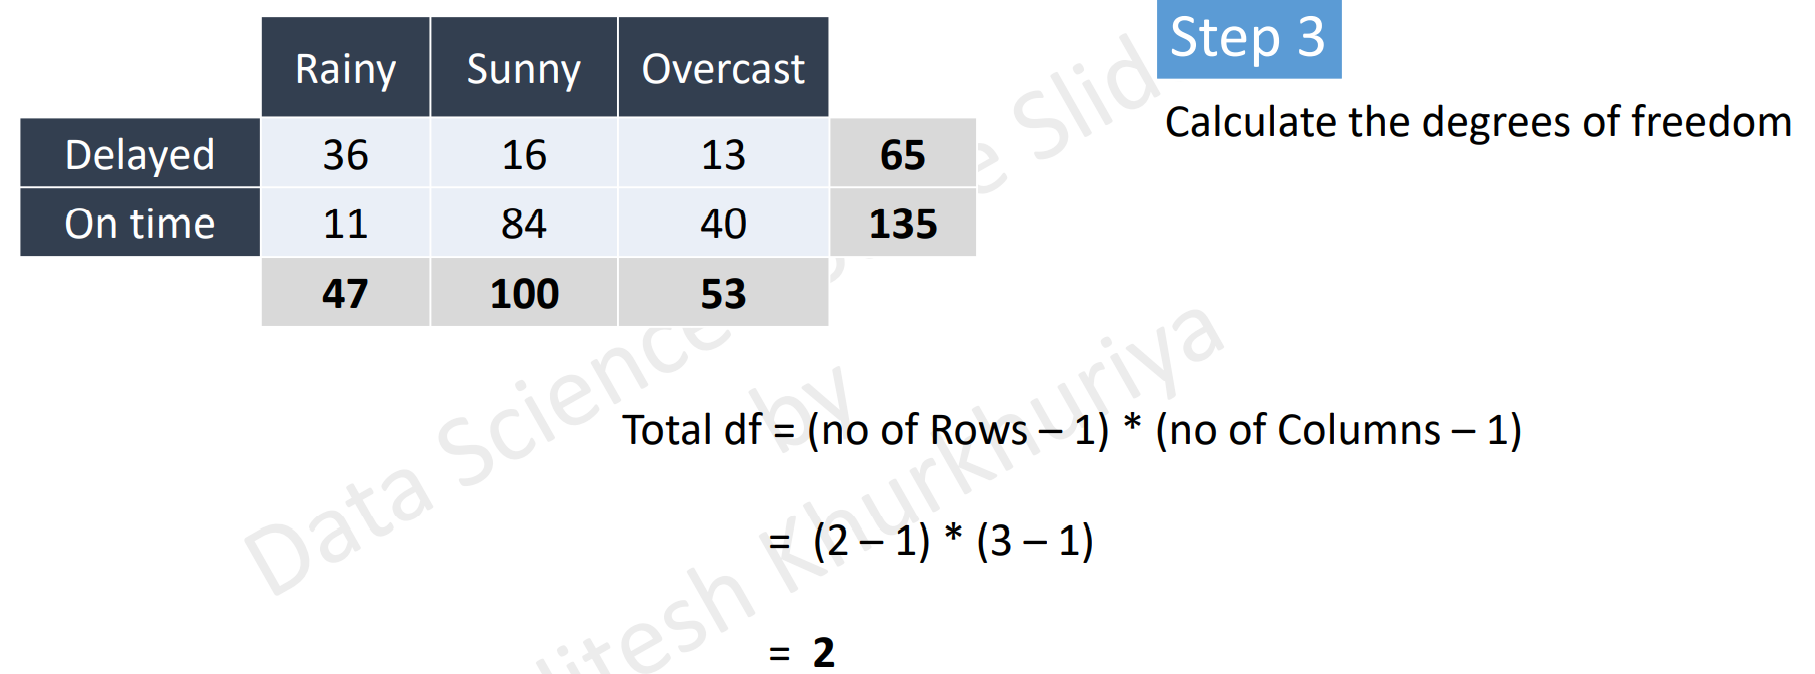
    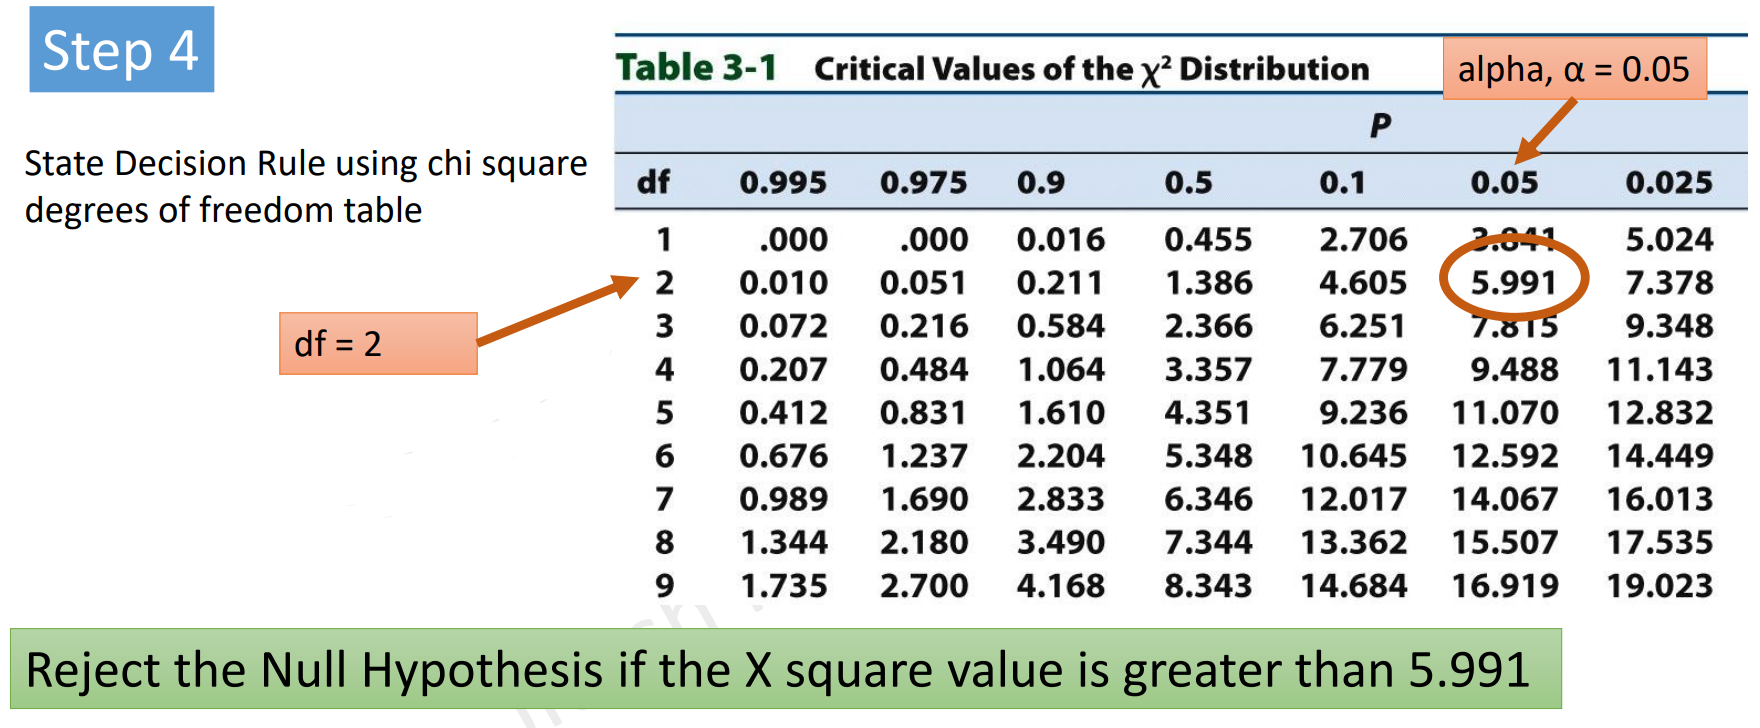
    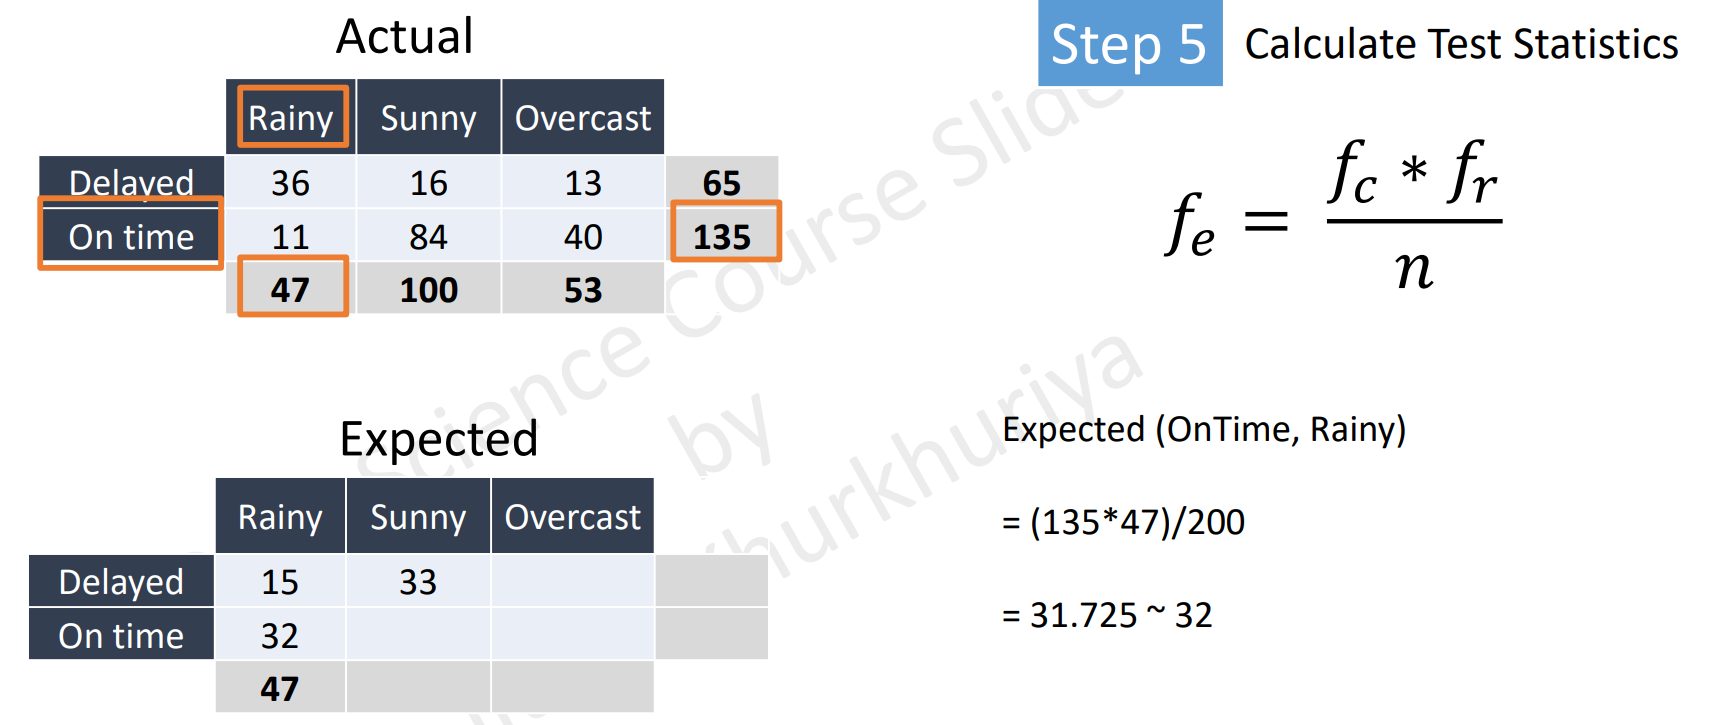
    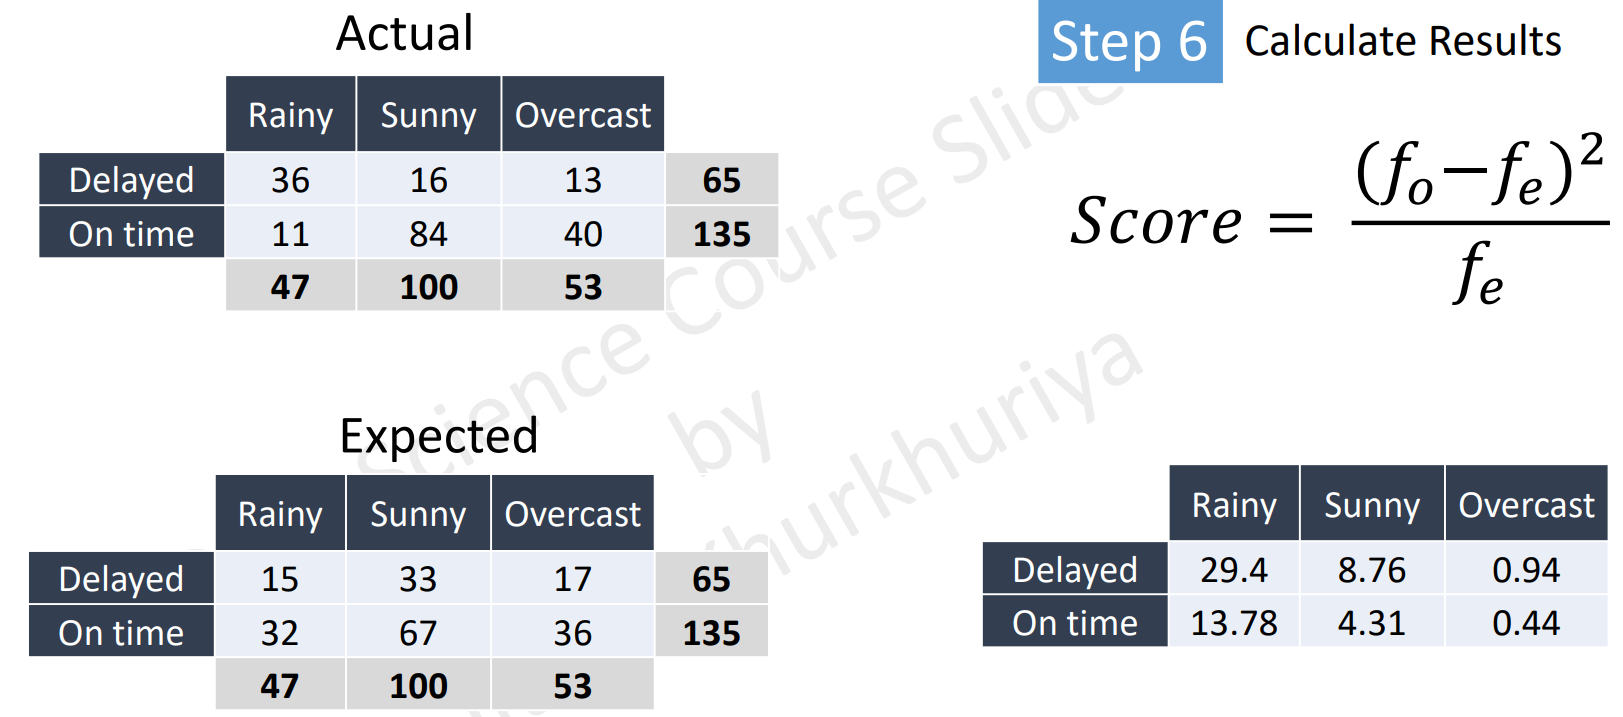
    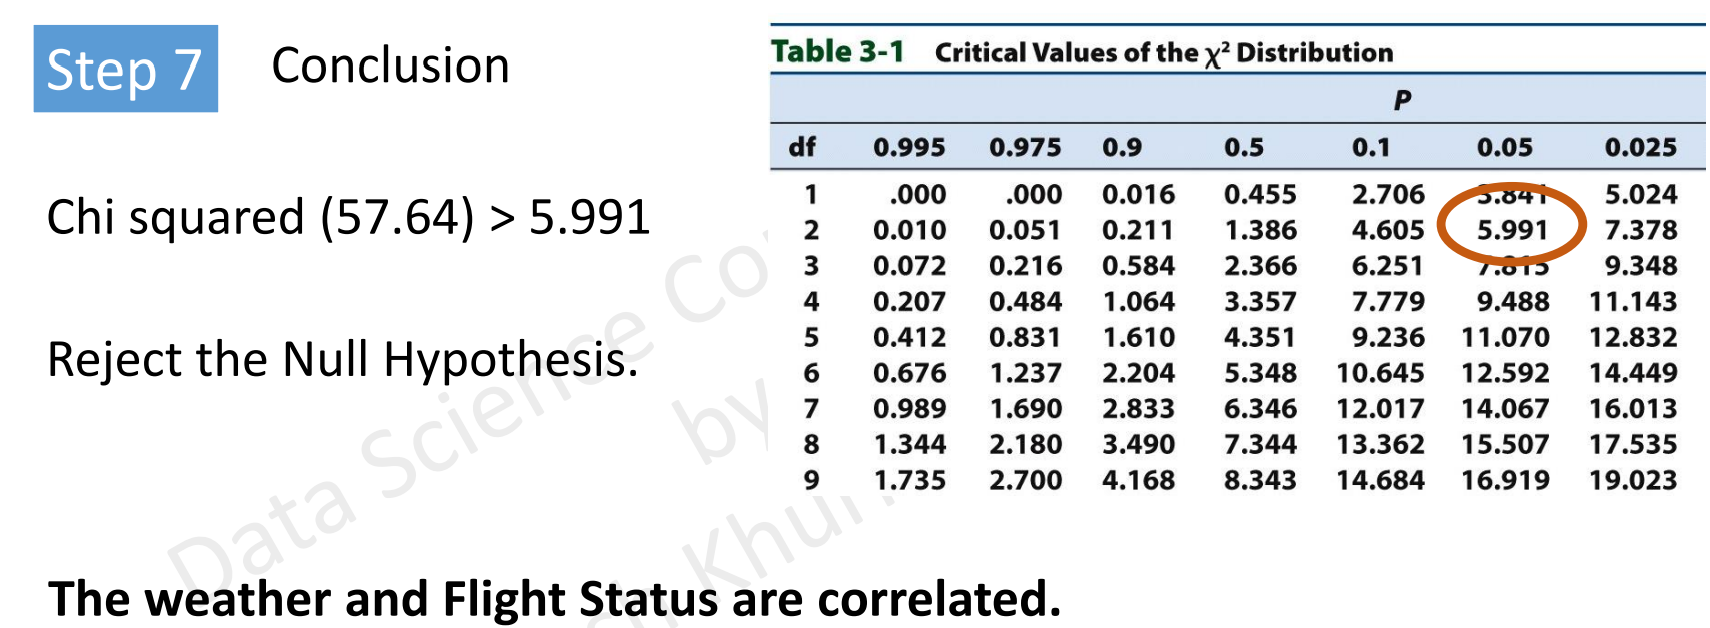
</div>


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data/Students2.csv")
df.head()

,Hours,sHours,hoursplayed,income,distance,calories,Marks
0,0,6,6,146,9,2491,34
1,1,7,2,112,5,2303,36
2,1,6,1,84,7,2475,33
3,1,8,5,134,0,2282,39
4,1,8,5,104,8,2359,42


In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression();

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],random_state=1)

model.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(pred,y_test)
mse, np.sqrt(mse)

(83.08930681255507, 9.115333609504102)

In [7]:
from sklearn.feature_selection import f_regression as fr

f_df = pd.DataFrame(fr(df.iloc[:,:-1],df.iloc[:,-1]))
f_df.columns = df.columns[0:6]

# First row = f-score
# Second row = p-value 
f_df

,Hours,sHours,hoursplayed,income,distance,calories
0,1.419059e+02,4.570198,0.001449,0.159991,0.003166,0.404209
1,1.770385e-12,0.041403,0.969907,0.692200,0.955528,0.530086


In [8]:
# Hours and sHours have p-val of less than 0.05
# We drop the rest of the features that have value greater than 0.05

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,-1],random_state=1)

model.fit(x_train,y_train)
pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(pred,y_test)
mse, np.sqrt(mse)

(76.61253439988556, 8.752858641603071)